# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Project: Wrangling and Analyze Data**
# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; by Utianle Helena Kolade


In this project, the goal is to wrangle WeRateDogs Twitter data to create an interesting and trustworthy analysis with visualizations to back up the analysis.

**WeRateDogs** is a Twitter account that rates people's dogs with a humorous comment about the dog. information involved in this analysis will include: tweet IDs, ratings, dog names, dog stages, retweet counts, favourite counts, images urls, and predictions of the dog types made by a neural network when the pictures of these dogs were passed through it.

The steps involved in this project are:
- Gathering data
- Assessing data
- Cleaning data
- Storing data
- Analyzing, and visualizing data
- Reporting

### Packages and libraries used

The python packages required for comprehensive analysis and representation of results gotten from the dataframe are:

+ **Pandas** for data analysis and cleaning
+ **Numpy** for numerical computations
+ **Matplotlib** for data visualisation
+ **Seaborn** also for data visualisation
+ **requests** for requesting/downloading data from HTTP
+ **os** for interacting with the operating system
+ **tweepy** gives you a very convenient way to access the Twitter API with Python
+ **Beautifulsoup** for pulling data out of HTML and XML files
+ **PIL** provides the python interpreter with image editing capabilities
+ **image** provides a number of factory functions, including functions to load images from files, and to create new images.

## 1.0 Data Gathering  

Data for this project will be gathered using three different methods:
1. Direct download  
2. Using the request library to download from given url
3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### 1.1 Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
# importing the initial necessary libraries to be used.

import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from bs4 import BeautifulSoup

In [33]:
# Reading the 'twitter-archive-enhanced' dataset into the dataframe.
df_twitter_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

In [34]:
df_twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [35]:
# Importing the libraries needed for requesting the tweet image predictions
import requests
import os

In [36]:
# Gathering the image predictions file from the given url   
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t', header=0)


In [37]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [66]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [67]:
df_tweepy = []
error_list = []

for tweet_id in df_twitter_enhanced['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)._json
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        df_tweepy.append({'tweet_id': tweet_id,
                        'favorite_count': int(favorite_count),
                        'retweet_count': int(retweet_count)})
    except Exception as e:
        print(str(tweet_id) + "_" + ": " + str(e))
        error_list.append({'tweet_id': int(tweet_id), 'error_reason': str(e)})

888202515573088257_: [{'code': 144, 'message': 'No status found with that ID.'}]
877611172832227328_: [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
873697596434513921_: [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937_: [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745_: [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329_: [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744_: [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_: [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130_: [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856_: [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560_: [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816_: [{'code': 144, 'message': 'No status found with that ID.'}]
84545907

In [68]:
#saving the suucessful records queried from api into a csv file
df_tweepy = pd.DataFrame(df_tweepy, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df_tweepy.to_csv('df_tweepy.csv', encoding = 'utf-8', index=False)

#saving the exception records into a file
error_list = pd.DataFrame(error_list, columns = ['tweet_id', 'error_reason'])
error_list.to_csv('error_list.csv', encoding = 'utf-8', index=False)

In [38]:
# Reading the saved tweepy file into a dataframe
df_tweepy = pd.read_csv('df_tweepy.csv', encoding = 'utf-8')
df_tweepy

,tweet_id,favorite_count,retweet_count
0,892420643555336193,32661,6842
1,892177421306343426,28266,5147
2,891815181378084864,21228,3400
3,891689557279858688,35623,7039
4,891327558926688256,34059,7562
5,891087950875897856,17147,2534
6,890971913173991426,9995,1616
7,890729181411237888,54961,15377
8,890609185150312448,23674,3541
9,890240255349198849,26973,5953


In [39]:
# Reading the saved error file into a dataframe
error_list = pd.read_csv('error_list.csv', encoding = 'utf-8')
error_list

,tweet_id,error_reason
0,888202515573088257,"[{'code': 144, 'message': 'No status found wit..."
1,877611172832227328,"[{'code': 179, 'message': 'Sorry, you are not ..."
2,873697596434513921,"[{'code': 144, 'message': 'No status found wit..."
3,872668790621863937,"[{'code': 144, 'message': 'No status found wit..."
4,872261713294495745,"[{'code': 144, 'message': 'No status found wit..."
5,869988702071779329,"[{'code': 144, 'message': 'No status found wit..."
6,866816280283807744,"[{'code': 144, 'message': 'No status found wit..."
7,861769973181624320,"[{'code': 144, 'message': 'No status found wit..."
8,856602993587888130,"[{'code': 144, 'message': 'No status found wit..."
9,856330835276025856,"[{'code': 144, 'message': 'No status found wit..."


## 2.0 Assessing Data
At least **eight (8) quality issues and two (2) tidiness issue** will be assesed using both visual assessment and programmatic assessement.

### 2.1 Assessing the `df_twitter_enhanced` dataset.

In [40]:
df_twitter_enhanced.shape

(2356, 17)

In [41]:
df_twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [42]:
df_twitter_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1455,695409464418041856,NaN,NaN,2016-02-05 00:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He just got back from his job int...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695409464...,10,10,Bob,None,None,None,None
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandonald. He accidentally opened the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758474966...,11,10,Brandonald,None,None,None,None
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
823,770069151037685760,NaN,NaN,2016-08-29 01:22:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Carbon. This is his first time sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770069151...,10,10,Carbon,None,None,None,None
1776,677961670166224897,NaN,NaN,2015-12-18 21:20:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Izzy. She's showing off the dance move...,NaN,NaN,NaN,https://vine.co/v/iKuMDuYV0aZ,11,10,Izzy,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None


In [43]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [44]:
df_twitter_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [45]:
df_twitter_enhanced['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [46]:
df_twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [47]:
df_twitter_enhanced.describe(exclude=[np.number])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",He's doing his best. 12/10 very impressive tha...,2015-11-19 01:27:25 +0000,"https://www.gofundme.com/helpquinny,https://tw...",None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [48]:
df_twitter_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [49]:
df_twitter_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [50]:
df_twitter_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [51]:
df_twitter_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### 2.2 Assessing the `df_image_predictions` dataset.

In [52]:
df_image_predictions.shape

(2075, 12)

In [53]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [54]:
df_image_predictions.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,Labrador_retriever,0.065706,True,hand_blower,0.012941,False
107,667873844930215936,https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg,1,common_iguana,0.999647,False,frilled_lizard,0.000181,False,African_chameleon,0.000128,False
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,tennis_ball,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True
980,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,Bernese_mountain_dog,0.979235,True,Shetland_sheepdog,0.011037,True,Appenzeller,0.003971,True
2010,878776093423087618,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian_greyhound,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True
1748,823581115634085888,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,dingo,0.280949,False,German_shepherd,0.194044,True,Pembroke,0.120051,True


In [55]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 2.3 Assessing the `df_tweepy` dataset.

In [56]:
df_tweepy.shape

(2326, 3)

In [57]:
df_tweepy.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,32661,6842
1,892177421306343426,28266,5147
2,891815181378084864,21228,3400
3,891689557279858688,35623,7039
4,891327558926688256,34059,7562


In [58]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
tweet_id          2326 non-null int64
favorite_count    2326 non-null int64
retweet_count     2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [59]:
df_tweepy.describe()

,tweet_id,favorite_count,retweet_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417346e+17,6821.931642,2412.141874
std,6.816442e+16,10599.697194,4083.176602
min,6.660209e+17,0.000000,0.000000
25%,6.780814e+17,1184.000000,485.000000
50%,7.178159e+17,2955.500000,1122.000000
75%,7.986402e+17,8340.000000,2790.250000
max,8.924206e+17,140838.000000,69059.000000


### 2.4 **Issues obsereved**

#### 2.4.1 Quality issues

#### - `df_twitter_enhanced` dataset
1. Missing values in *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id *, *retweeted_status_user_id*, *retweeted_status_timestamp*, and *expanded_urls* columns.
 
2. There are 181 records of *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp* but only original ratings (no retweets) that have images are needed.
 
3. *timestamp* and  *retweeted_status_timestamp* datatypes set to object instead of datetime.

4. *tweet_id* in int64 datatype rather than object.

5. *in_reply_to_status_id*, and *in_reply_to_user_id* appear as floats rather than objects.

6. Outliers in both *rating_denominator* and *rating_numerator* columns. Maximum values other than 10 for denominator and very high values also for numerator.

7. The source column has an html structure which can be simplified for better understanding.

#### - `df_image_predictions` dataset

8. *tweet_id* in int64 datatype rather than object.

9. Capitalisation inconsistency in P1, P2 and P3 columns and hyphen inplace of spaces.

10. Incomplete column header names for *img_num*, p1, *p1_conf*, *p1_dog*, p2, *p2_conf*, *p2_dog*, p3, *p3_conf*, and *p3_dog*.

#### 2.4.2 Tidiness issues

#### - `df_twitter_enhanced` dataset
1. The dog stages are in 4 different columns rather than put as 1 column in the *twitter_archive_enhanced* table.

#### - `df_tweepy` and `df_image_predictions` datasets
2. These datasets can be merged with the twitter_enhanced dataset.

## 3.0 Cleaning Data

In [98]:
# Making copies of original pieces of data
twitter_enhanced_clean = df_twitter_enhanced.copy()
image_predictions_clean = df_image_predictions.copy()
tweepy_clean = df_tweepy.copy()

### 3.1 Issue #1: Missing data issues

#### 3.1.1
#### - Missing values in *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id *, *retweeted_status_user_id*, *retweeted_status_timestamp), and *expanded_urls columns*.

#### - There are 181 records of *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp* but only original ratings (no retweets) that have images are needed.

#### Define:

`twitter_enhanced_cleaned`: Address the missing values issues in *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*, *in_reply_to_user_id*, *in_reply_to_status_id*, and *expanded_urls* by comparing and deleting of rows and columns.

#### Code

In [99]:
# Comparing the three retweet columns
twitter_enhanced_clean["compare"] = (twitter_enhanced_clean["retweeted_status_id"].isnull() & twitter_enhanced_clean["retweeted_status_user_id"].isnull() & twitter_enhanced_clean["retweeted_status_timestamp"].isnull())

In [100]:
twitter_enhanced_clean['compare'].value_counts()

True     2175
False     181
Name: compare, dtype: int64

> This confirms that all the non null entries in the three colums are on the same row.

In [101]:
# Dropping the rows with retweet data
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean.compare == True]
twitter_enhanced_clean.shape

(2175, 18)

In [102]:
#Dropping the retweet columns, in_reply_to columns and compare column created
twitter_enhanced_clean.drop("retweeted_status_id", inplace=True, axis=1)
twitter_enhanced_clean.drop("retweeted_status_user_id", inplace=True, axis=1)
twitter_enhanced_clean.drop("retweeted_status_timestamp", inplace=True, axis=1)
twitter_enhanced_clean.drop("compare", inplace=True, axis=1)
twitter_enhanced_clean.drop("in_reply_to_user_id", inplace=True, axis=1)
twitter_enhanced_clean.drop("in_reply_to_status_id", inplace=True, axis=1)

> From assessing the information given on the dataset and from the analysis to be done, the in_reply_to_user_id, and in_reply_to_status_id columns will not be useful to me. Hence they were dropped.

#### Test

In [103]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


 > This cleaning operation does not only solve the issue of missing data but also solves the issue of having no retweets in the dataset.  
 There are still some missing values in the expanded_urls column, but they are not so many and as such will be ignored.

### 3.2 Issue #2: Tidiness issues

#### 3.2.1 The dog stages in are in 4 different columns rather than put as 1 column in the twitter_archive_enhanced table.

#### Define
`df_twitter_enhanced`: Melt the 4 dog stage columns into 1 column.

#### Code

In [104]:
# replace all NaN and 'None' dog_stage to an empty string
twitter_enhanced_clean.doggo.replace('None', '', inplace=True)
twitter_enhanced_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_enhanced_clean.floofer.replace('None', '', inplace=True)
twitter_enhanced_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_enhanced_clean.pupper.replace('None', '', inplace=True)
twitter_enhanced_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_enhanced_clean.puppo.replace('None', '', inplace=True)
twitter_enhanced_clean.puppo.replace(np.NaN, '', inplace=True)

In [105]:
# group by dog_stage to see the breakdown of unique stages
twitter_enhanced_clean.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: 'count'})

,doggo,floofer,pupper,puppo,count
0,,,,,1831
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [106]:
# concatenate dog_stages into a single column
twitter_enhanced_clean['dog_stage'] = twitter_enhanced_clean.doggo + twitter_enhanced_clean.floofer + twitter_enhanced_clean.pupper + twitter_enhanced_clean.puppo

# fix multiple stage rows
twitter_enhanced_clean.loc[twitter_enhanced_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_enhanced_clean.loc[twitter_enhanced_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_enhanced_clean.loc[twitter_enhanced_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [107]:
# drop previous dog stage columns
twitter_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [108]:
twitter_enhanced_clean.head(30)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [109]:
twitter_enhanced_clean['dog_stage'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

#### 3.2.2 Tweepy data set and image_predictions data set can be merged with the twitter_enhanced dataset.

#### Define

`df_tweepy dataset`: Merged with the twitter_enhanced dataset.  
`df_image_predictions` dataset: Merged with the twitter_enhanced dataset.

#### Code

In [138]:
#inner join on twwet_id to maintain the cleaning done on twitter_enhanced_clean
twitter_enhanced_clean_merged = pd.merge(twitter_enhanced_clean, tweepy_clean,
                            on=['tweet_id'], how='inner')

In [139]:
twitter_enhanced_clean_merged = pd.merge(twitter_enhanced_clean_merged, image_predictions_clean,
                            on=['tweet_id'], how='inner')

#### Test

In [140]:
twitter_enhanced_clean_merged.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,32661,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,28266,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,21228,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,35623,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,34059,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [141]:
twitter_enhanced_clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null object
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
dog_stage             1986 non-null object
favorite_count        1986 non-null int64
retweet_count         1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float

### 3.3 Issue #3: Quality issues

#### 3.3.1
#### - timestamp datatype set to object instead of datetime.
#### - tweet_id in int64 datatype rather than object.

#### Define

Correct data types for all incorrect columns in the `twitter_enhanced` dataset.

#### Code

In [142]:
# To object
twitter_enhanced_clean_merged['tweet_id'] = twitter_enhanced_clean_merged['tweet_id'].astype(str)

# To datetime
twitter_enhanced_clean_merged['timestamp'] = pd.to_datetime(twitter_enhanced_clean_merged['timestamp'])

#### Test

In [143]:
twitter_enhanced_clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
dog_stage             1986 non-null object
favorite_count        1986 non-null int64
retweet_count         1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-n

#### 3.3.2 Outliers in both rating_denominator and rating_numerator columns. Maximum values other than 10 for denominator and very high values also for numerator.

#### Define

Identifying entries with values higher than 10 and eliminating the outliers. this is for clearer visual analysis.

#### Code

In [144]:
twitter_enhanced_clean_merged['rating_denominator'].value_counts()

10     1968
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [145]:
twitter_enhanced_clean_merged['rating_numerator'].value_counts()

12      448
10      417
11      396
13      257
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [146]:
#keeping rows where denominator is 10 and numerator is beteen 1 and 14 based on the frequencies 
twitter_enhanced_clean_merged = twitter_enhanced_clean_merged[(twitter_enhanced_clean_merged.rating_denominator == 10) &
                                                             (twitter_enhanced_clean_merged.rating_numerator > 0) &
                                                             (twitter_enhanced_clean_merged.rating_numerator < 15)]

#### Test

In [147]:
twitter_enhanced_clean_merged['rating_denominator'].value_counts()

10    1961
Name: rating_denominator, dtype: int64

In [148]:
twitter_enhanced_clean_merged['rating_numerator'].value_counts()

12    448
10    417
11    396
13    257
9     150
8      95
7      51
14     35
5      33
6      32
3      19
4      15
2       9
1       4
Name: rating_numerator, dtype: int64

#### 3.3.3 Incomplete column header names for img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog.

#### Define
Change incomplete column headers. *img_num* to *image_number*, *p(1-3)* to *prediction(1-3)*, *p(1-3)_conf* to *prediction(1-3)_confidence*, *p(1-3)_dog* to *prediction(1-3)_dog*.

#### Code

In [149]:
twitter_enhanced_clean_merged = twitter_enhanced_clean_merged.rename({'img_num':'image_number', 'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_dog','p2':'prediction2','p2_conf':'prediction2_confidence','p2_dog':'prediction2_dog','p3':'prediction3','p3_conf':'prediction3_confidence','p3_dog':'prediction3_dog'}, axis=1)

#### Test

In [150]:
twitter_enhanced_clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id                  1961 non-null object
timestamp                 1961 non-null datetime64[ns]
source                    1961 non-null object
text                      1961 non-null object
expanded_urls             1961 non-null object
rating_numerator          1961 non-null int64
rating_denominator        1961 non-null int64
name                      1961 non-null object
dog_stage                 1961 non-null object
favorite_count            1961 non-null int64
retweet_count             1961 non-null int64
jpg_url                   1961 non-null object
image_number              1961 non-null int64
prediction1               1961 non-null object
prediction1_confidence    1961 non-null float64
prediction1_dog           1961 non-null bool
prediction2               1961 non-null object
prediction2_confidence    1961 non-null float64
prediction2_dog           1961 non-null bool

#### 3.3.4 The source column has an html structure which can be simplified for better understanding.

#### Define
Extract only the source text from the html using beautiful soup.

#### Code

In [151]:
#creating a function to extract just the text from the tag
def get_text(tag):
    soup = BeautifulSoup(tag, 'lxml')
    source = soup.get_text()
    return source

In [152]:
twitter_enhanced_clean_merged['source'] = twitter_enhanced_clean_merged['source'].apply(get_text)

#### Test

In [153]:
twitter_enhanced_clean_merged['source'].sample(7)

528     Twitter for iPhone
477     Twitter for iPhone
538     Twitter for iPhone
860     Twitter for iPhone
1951    Twitter for iPhone
1279    Twitter for iPhone
1782    Twitter for iPhone
Name: source, dtype: object

#### 3.3.5 Capitalisation inconsistency in P1, P2 and P3 columns and hyphens inplace of spaces.

#### Define
Capitalize all names in the prediction columns and replace '_' with spaces.

#### Code

In [154]:
# To capitalise
twitter_enhanced_clean_merged.prediction1 = twitter_enhanced_clean_merged.prediction1.str.capitalize()
twitter_enhanced_clean_merged.prediction2 = twitter_enhanced_clean_merged.prediction2.str.capitalize()
twitter_enhanced_clean_merged.prediction3 = twitter_enhanced_clean_merged.prediction3.str.capitalize()

In [155]:
# To strip '-'
twitter_enhanced_clean_merged['prediction1'] = twitter_enhanced_clean_merged['prediction1'].str.replace('_', ' ')
twitter_enhanced_clean_merged['prediction2'] = twitter_enhanced_clean_merged['prediction2'].str.replace('_', ' ')
twitter_enhanced_clean_merged['prediction3'] = twitter_enhanced_clean_merged['prediction3'].str.replace('_', ' ')

#### Test

In [156]:
twitter_enhanced_clean_merged.sample(7)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,image_number,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
1843,668623201287675904,2015-11-23 02:52:48,Twitter for iPhone,This is Jomathan. He is not thrilled about the...,https://twitter.com/dog_rates/status/668623201...,10,10,Jomathan,,1221,...,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,Titi,0.067325,False
714,750056684286914561,2016-07-04 20:00:23,TweetDeck,This is Jameson. He had a few too many in the ...,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,,2861,...,1,Saluki,0.484428,True,Borzoi,0.263550,True,Labrador retriever,0.077004,True
1103,698989035503689728,2016-02-14 21:55:47,Twitter for iPhone,This is Oliver. He does toe touches in his sle...,https://twitter.com/dog_rates/status/698989035...,13,10,Oliver,,2993,...,1,Norfolk terrier,0.246340,True,Irish terrier,0.243349,True,Golden retriever,0.085871,True
227,836001077879255040,2017-02-26 23:52:43,Twitter for iPhone,Atlas is back and this time he's prettier than...,https://twitter.com/dog_rates/status/836001077...,13,10,None,,17272,...,4,Samoyed,0.963558,True,White wolf,0.019848,False,Malamute,0.005904,True
896,719704490224398336,2016-04-12 01:51:36,Twitter for iPhone,This is Clyde. He's making sure you're having ...,https://twitter.com/dog_rates/status/719704490...,12,10,Clyde,pupper,4027,...,1,Home theater,0.059033,False,Window shade,0.038299,False,Bathtub,0.035528,False
617,765395769549590528,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,,24236,...,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland sheepdog,0.038875,True
795,740359016048689152,2016-06-08 01:45:19,Twitter for iPhone,This is Chase. He's in a predicament. 9/10 hel...,https://twitter.com/dog_rates/status/740359016...,9,10,Chase,,2960,...,1,Golden retriever,0.863687,True,Kuvasz,0.048590,True,Labrador retriever,0.047397,True


In [157]:
twitter_enhanced_clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id                  1961 non-null object
timestamp                 1961 non-null datetime64[ns]
source                    1961 non-null object
text                      1961 non-null object
expanded_urls             1961 non-null object
rating_numerator          1961 non-null int64
rating_denominator        1961 non-null int64
name                      1961 non-null object
dog_stage                 1961 non-null object
favorite_count            1961 non-null int64
retweet_count             1961 non-null int64
jpg_url                   1961 non-null object
image_number              1961 non-null int64
prediction1               1961 non-null object
prediction1_confidence    1961 non-null float64
prediction1_dog           1961 non-null bool
prediction2               1961 non-null object
prediction2_confidence    1961 non-null float64
prediction2_dog           1961 non-null bool

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [158]:
twitter_enhanced_clean_merged.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

A few questions will be answered using analysis. The questions are:
1. What dog stage has higher ratings?
2. what source is being used the most?
3. Which breed of dogs were loved the most based on favourite and retweets?

In [5]:
# Reading the stored dataset to be used for analysis rather in order to reduce the number of cells to re-run.
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

For the ratings analysis, only the *rating_numerator* will be needed and not the *rating_denominator*. The average ratings for all dog stages will be gotten as this will be a better medium for doing this analysis.

In [6]:
#getting the dog stage with the highest average rating
dog_stage_ratings = twitter_archive_master.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending=False)

In [7]:
dog_stage_ratings

dog_stage
doggo, puppo      13.000000
puppo             12.000000
floofer           12.000000
doggo             11.870968
doggo, pupper     11.000000
doggo, floofer    11.000000
pupper            10.633663
Name: rating_numerator, dtype: float64

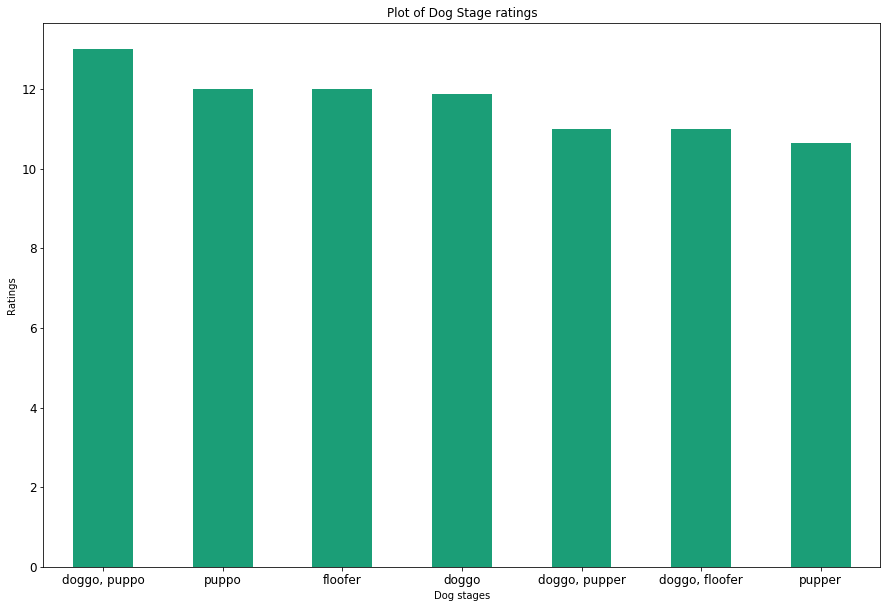

In [28]:
dog_stage_ratings.plot(kind='bar', figsize= (15,10), title = 'Plot of Dog Stage ratings', colormap = 'Dark2', rot = 0, fontsize = 12)
plt.xlabel('Dog stages')
plt.ylabel('Ratings')
plt.show()

Using the `value_counts()` code, the source column is analized to get insights.

In [8]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1924
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64

Using the `value_counts()` code as well to get a breakdown of the *prediction1* resuslts. This prediction is seen as the most accurate, therefore other predictions will not be analysed for now.

In [9]:
twitter_archive_master.prediction1.value_counts()

Golden retriever             135
Labrador retriever            89
Pembroke                      88
Chihuahua                     79
Pug                           54
Chow                          41
Samoyed                       39
Pomeranian                    37
Toy poodle                    37
Malamute                      29
Cocker spaniel                27
French bulldog                25
Chesapeake bay retriever      23
Miniature pinscher            22
Seat belt                     21
German shepherd               20
Siberian husky                19
Eskimo dog                    18
Shetland sheepdog             18
Staffordshire bullterrier     18
Rottweiler                    17
Cardigan                      17
Maltese dog                   17
Shih-tzu                      17
Beagle                        17
Teddy                         17
Lakeland terrier              16
Italian greyhound             16
Web site                      15
Kuvasz                        15
          

Analysing the *favourite_count* and the *retweet_count* by dog breed using *prediction1*

In [13]:
fav_count_by_breed = twitter_archive_master.groupby('prediction1')['favorite_count'].sum().sort_values(ascending=False)
fav_count_by_breed.head(8)

prediction1
Golden retriever      1386394
Labrador retriever     871661
Pembroke               837714
Chihuahua              578593
Samoyed                433094
French bulldog         394433
Chow                   341801
Pug                    262440
Name: favorite_count, dtype: int64

In [14]:
retweet_count_by_breed = twitter_archive_master.groupby('prediction1')['retweet_count'].sum().sort_values(ascending=False)
retweet_count_by_breed.head(8)

prediction1
Golden retriever      385089
Labrador retriever    269690
Pembroke              221922
Chihuahua             178610
Samoyed               138271
French bulldog         95687
Chow                   93210
Pomeranian             79415
Name: retweet_count, dtype: int64

Displaying the picture of the dog with the most likes (favorite_count).
For this, we used the request library and also imported image from PIL in order to achieve this.

In [31]:
dog_with_max_likes = twitter_archive_master.loc[twitter_archive_master['favorite_count'].idxmax()]
dog_with_max_likes

tweet_id                                                 744234799360020481
timestamp                                               2016-06-18 18:26:18
source                                                   Twitter for iPhone
text                      Here's a doggo realizing you can stand in a po...
expanded_urls             https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                         13
rating_denominator                                                       10
name                                                                   None
dog_stage                                                             doggo
favorite_count                                                       140838
retweet_count                                                         69059
jpg_url                   https://pbs.twimg.com/ext_tw_video_thumb/74423...
image_number                                                              1
prediction1 

In [32]:
image_url = dog_with_max_likes.jpg_url

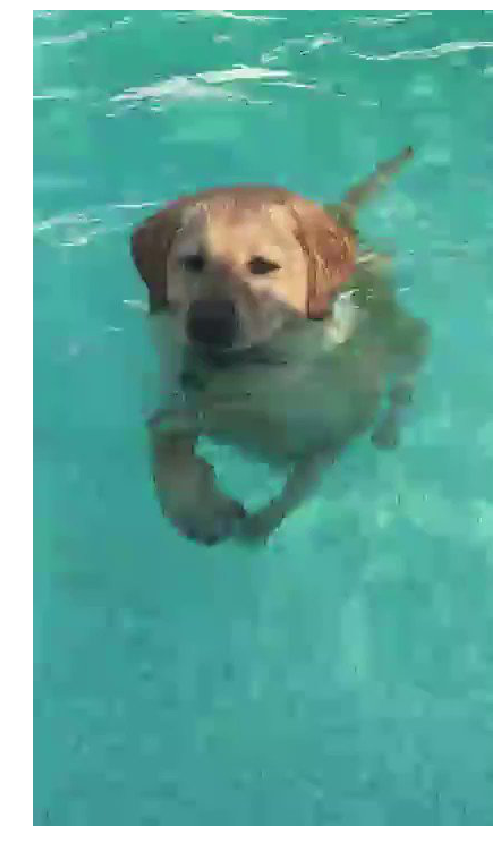

In [46]:
from PIL import Image
import requests

response = requests.get(image_url, stream=True)
img = Image.open(response.raw)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(img)
plt.show()

### Insights:
1. From the analysis, it is seen that doggo,puppo dog stage has the highest average rating (13.0), while the pupper dog stage has the lowest average rating (10.63).

2. Majority of the tweets ralated to this data set were tweeted from iphones as seen in the analysis of the source column.

3. The highest predictions gotten from the pictures passed through the neural network based on **prediction1** was *Golden retriever* with 135 predictions, with *Labrador retriever*, *Pembroke*, and *Chihauhau* coming in 2nd, 3rd and 4th respectively. 

4. It can also be seen from the *prediction1* analysis that a lot of the predictions came out as not even dogs with examples such as: cardigan, web site, Teapot, Handkerchief, Pillow, Pot, Microwave, Zebra etc. This can be corrected probably by giving specifications of the pictures to be posted.

5. It can be seen that the same category of dog breeds got the top 7 highest total likes (favourite_count) and retweets (retweet_count). On one hand, this means that these breeds are the most liked and thus had more likes and retweets. On the other hand, it could also be that these breeds were posted more and therefore had more total likes and retweets when summed up.